# Small Project 2: Mapping protein-protein interactions

In [37]:
import nglview

## Load a protein structure from local directory
view = nglview.show_file('MSH2_MSH6_complex.pdb')

view

NGLWidget()

In [22]:
### Extract residues of the protein-protein interaction interface

from Bio.PDB import PDBParser

# Load the PDB file
parser = PDBParser()
structure = parser.get_structure('protein', 'MSH2_MSH6_complex.pdb')

# Extract residues within a distance threshold

threshold = 5.0  # Distance threshold for interface residues

chainA = structure[0]['A'] 
chainB = structure[0]['B']

res_A = sorted([res for res in chainA.get_residues() if res.get_id()[0] ==' ']) 
res_B = sorted([res for res in chainB.get_residues() if res.get_id()[0] ==' '])


interface1_list = []; interface2_list = []

for res1 in res_A:
    for res2 in res_B:
        if res1['CA']-res2['CA'] < threshold:
            interface1_list.append(res1)
            interface2_list.append(res2)


/Users/whe3/anaconda3/envs/mypymolenv/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15838.
  warnings.warn(
/Users/whe3/anaconda3/envs/mypymolenv/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 15866.
  warnings.warn(


             MSH6_SER472  MSH6_SER532  MSH6_THR987  MSH6_MET1137  \
MSH2_MET1              1            0            0             0   
MSH2_THR60             0            1            0             0   
MSH2_ARG534            0            0            1             0   
MSH2_SER723            0            0            0             1   
MSH2_LEU730            0            0            0             0   
MSH2_SER755            0            0            0             0   
MSH2_GLY761            0            0            0             0   
MSH2_LEU762            0            0            0             0   
MSH2_HIS783            0            0            0             0   
MSH2_ALA834            0            0            0             0   
MSH2_PHE836            0            0            0             0   

             MSH6_SER1195  MSH6_ALA1198  MSH6_ALA1220  MSH6_HIS1248  \
MSH2_MET1               0             0             0             0   
MSH2_THR60              0             0  

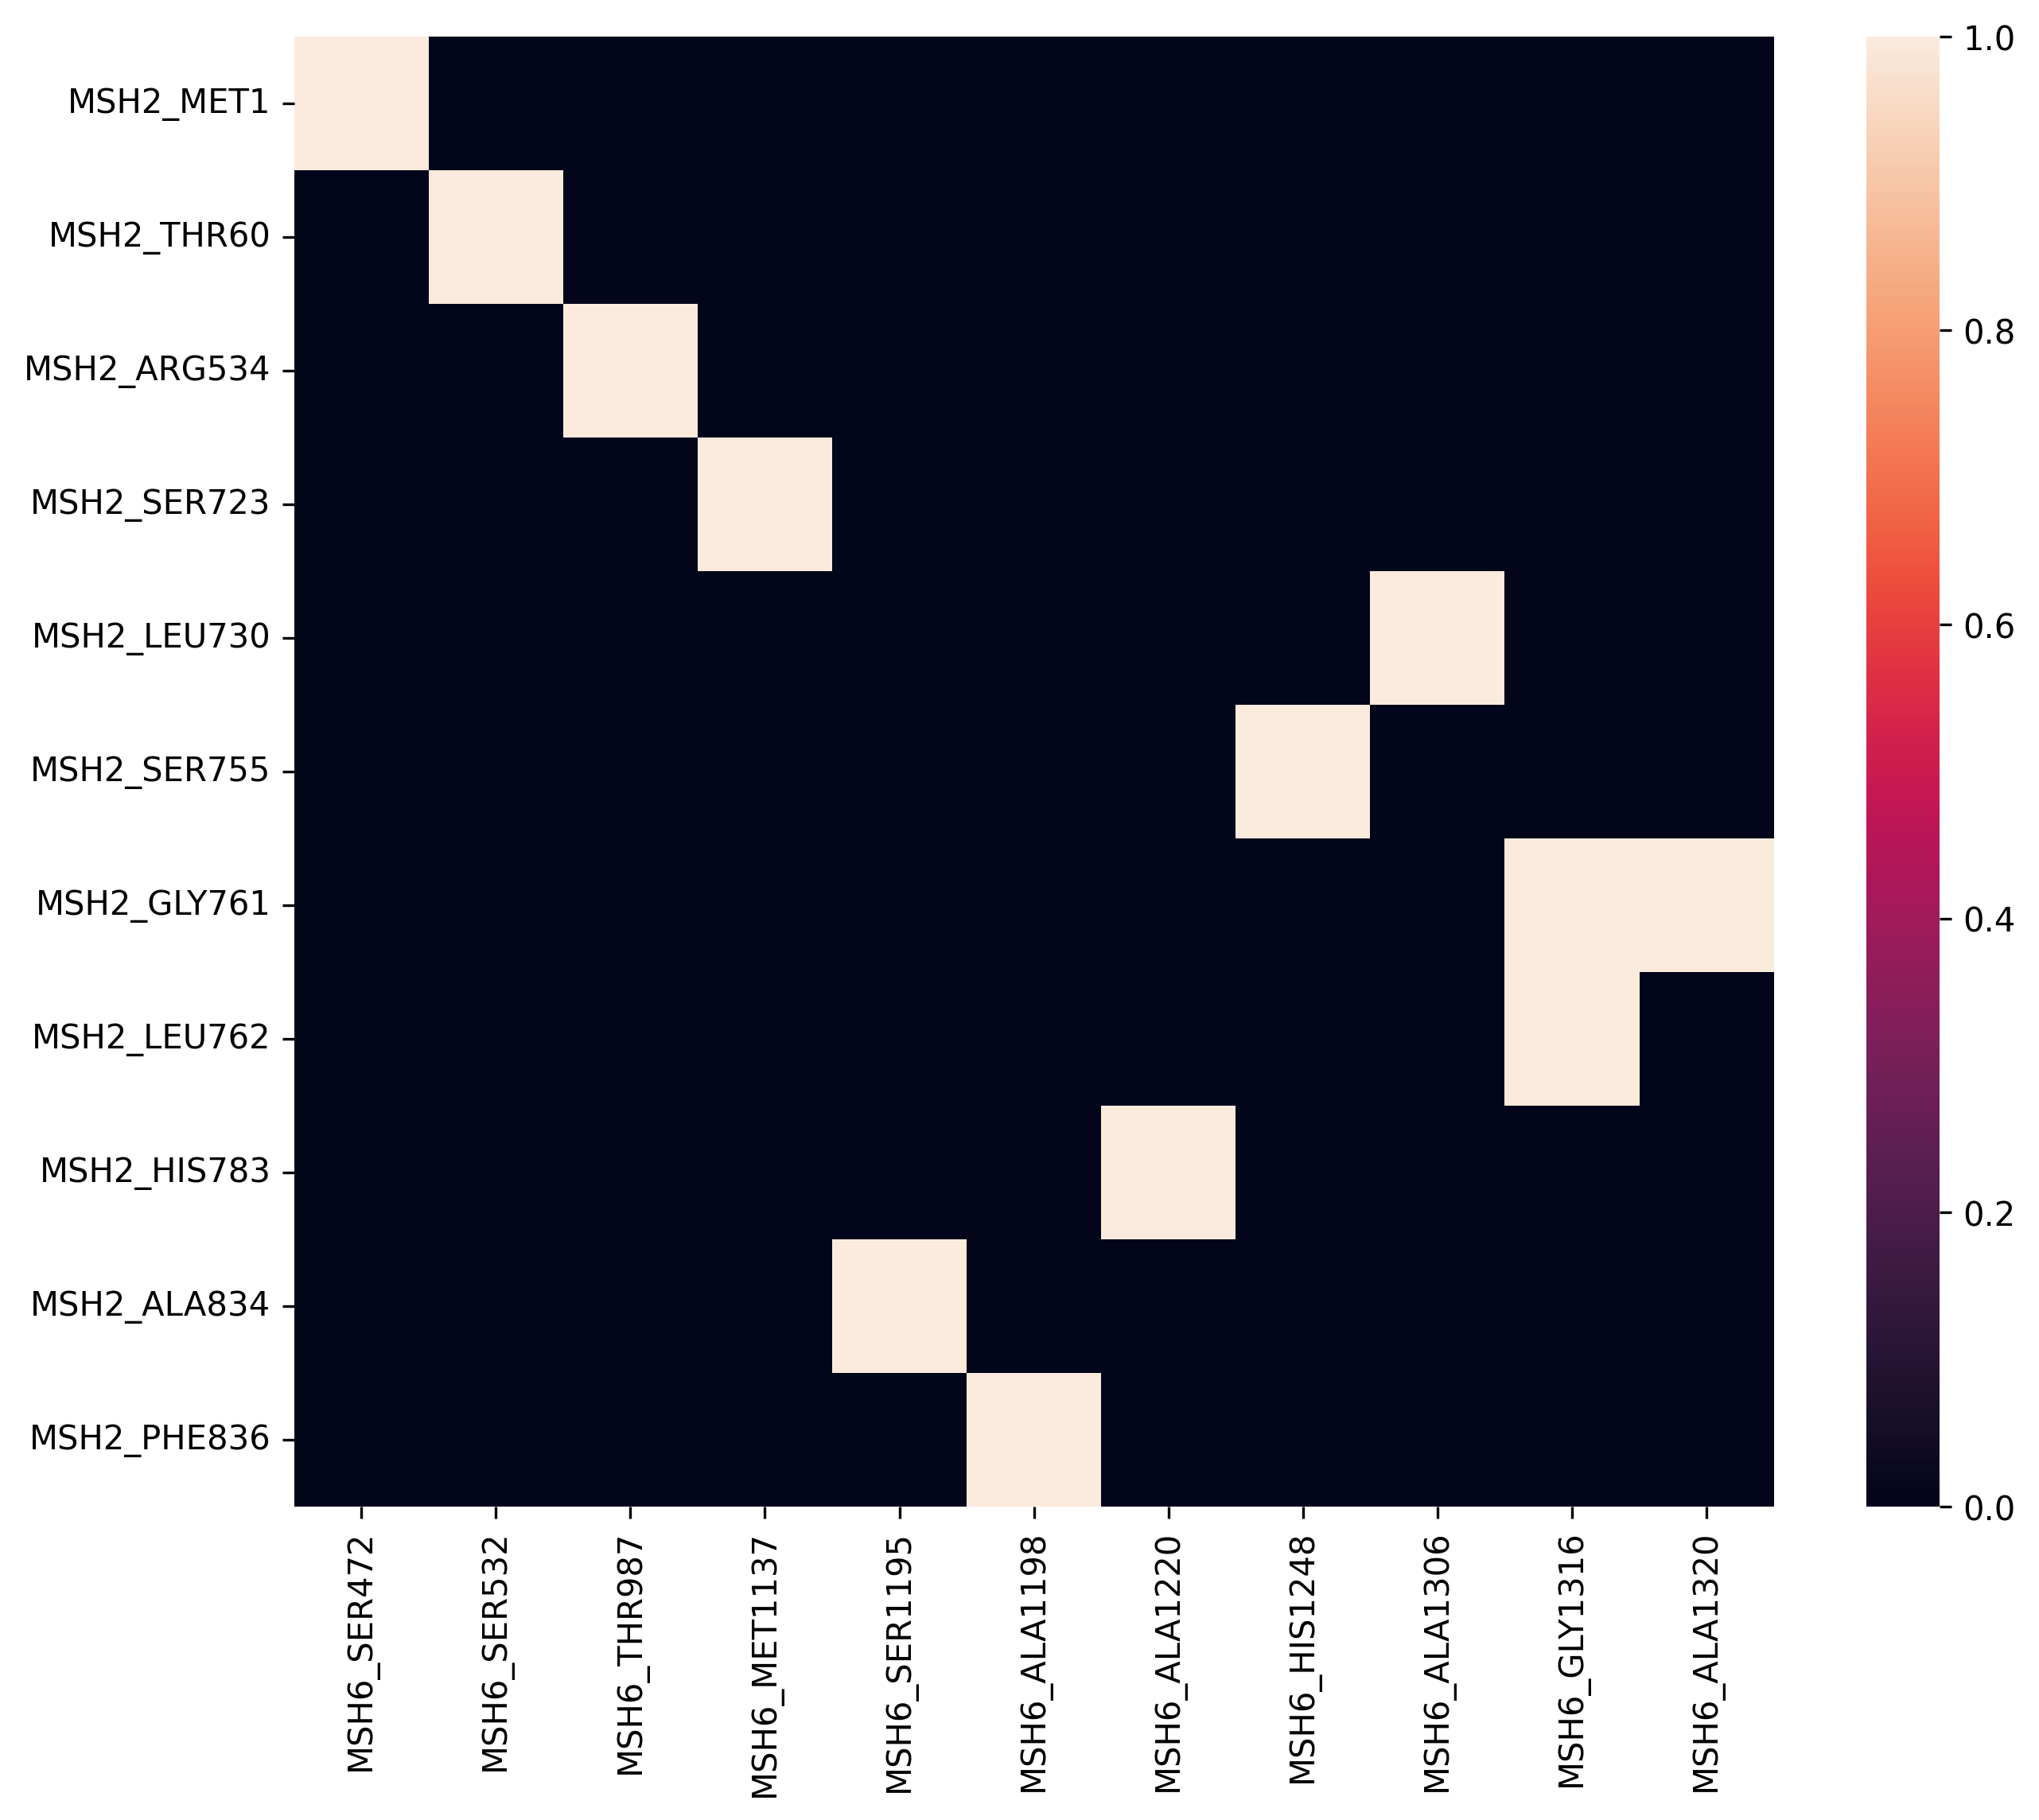

In [38]:
### Draw the contacting map between residues of the interface
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

dis_ls_all = []

for res1 in sorted(set(interface1_list)):
    dis_ls = []
    for res2 in sorted(set(interface2_list)):
        if res1['CA']-res2['CA'] < 5:
            #print(res1,res2)
            dis_ls.append(1)
        else:
            dis_ls.append(0)
    
    dis_ls_all.append(dis_ls)
        
#print(dis_ls_all)
data = pd.DataFrame(dis_ls_all)

data.index = ['MSH2_'+res.get_resname()+str(res.get_id()[1]) for res in sorted(set(interface1_list))]
data.columns = ['MSH6_'+res.get_resname()+str(res.get_id()[1]) for res in sorted(set(interface2_list))]

print(data)

plt.figure(figsize=(10,8),dpi=300)
sns.heatmap(data)
plt.savefig('ContactingMap.png',dpi=300)

In [39]:
### Construct the distance matrix

import pandas as pd

dis_ls_all = []

for res1 in sorted(set(interface1_list)):
    dis_ls = []
    for res2 in sorted(set(interface2_list)):
        dis_ls.append(res1['CA']-res2['CA'])
    
    dis_ls_all.append(dis_ls)
        
#print(dis_ls_all)

data = pd.DataFrame(dis_ls_all)

#print(data)

data.index = ['MSH4_'+res.get_resname()+str(res.get_id()[1]) for res in sorted(set(interface1_list))]
data.columns = ['MSH6_'+res.get_resname()+str(res.get_id()[1]) for res in sorted(set(interface2_list))]

data

,MSH6_SER472,MSH6_SER532,MSH6_THR987,MSH6_MET1137,MSH6_SER1195,MSH6_ALA1198,MSH6_ALA1220,MSH6_HIS1248,MSH6_ALA1306,MSH6_GLY1316,MSH6_ALA1320
MSH4_MET1,4.738236,10.154705,57.211994,40.415604,37.542465,41.364197,47.737900,46.525539,45.968632,55.517738,57.543606
MSH4_THR60,11.153484,4.891201,60.646561,36.484341,36.003319,39.141060,46.916912,43.602253,43.618717,53.621746,55.443680
MSH4_ARG534,55.059887,62.069599,4.947347,96.759171,94.339569,98.048042,104.806931,104.271790,99.966736,111.431099,114.378021
MSH4_SER723,41.615643,36.450962,92.411842,4.258904,25.745710,27.509306,23.136894,14.787074,12.201120,20.664030,23.027077
MSH4_LEU730,46.598370,43.605633,95.372604,13.805041,32.780491,35.163754,24.693289,20.117533,4.999516,16.332727,21.235886
MSH4_SER755,51.687374,46.765480,104.584999,12.734893,22.935242,23.169104,13.237558,3.975919,17.331169,12.552842,11.027478
MSH4_GLY761,57.265530,53.614857,109.196625,19.118084,30.080299,30.856779,15.300279,13.268911,16.235426,4.363459,4.987454
MSH4_LEU762,54.976707,51.594746,106.286484,17.462912,30.437008,31.703711,16.610590,14.175299,12.900175,4.789393,8.560139
MSH4_HIS783,49.048740,46.575962,102.229782,21.543129,19.870586,21.894178,4.919494,13.288462,22.974352,17.297466,16.223867
MSH4_ALA834,42.732430,39.204948,96.972664,29.894695,4.990666,6.449040,17.272707,21.929653,38.316818,35.478252,32.752014


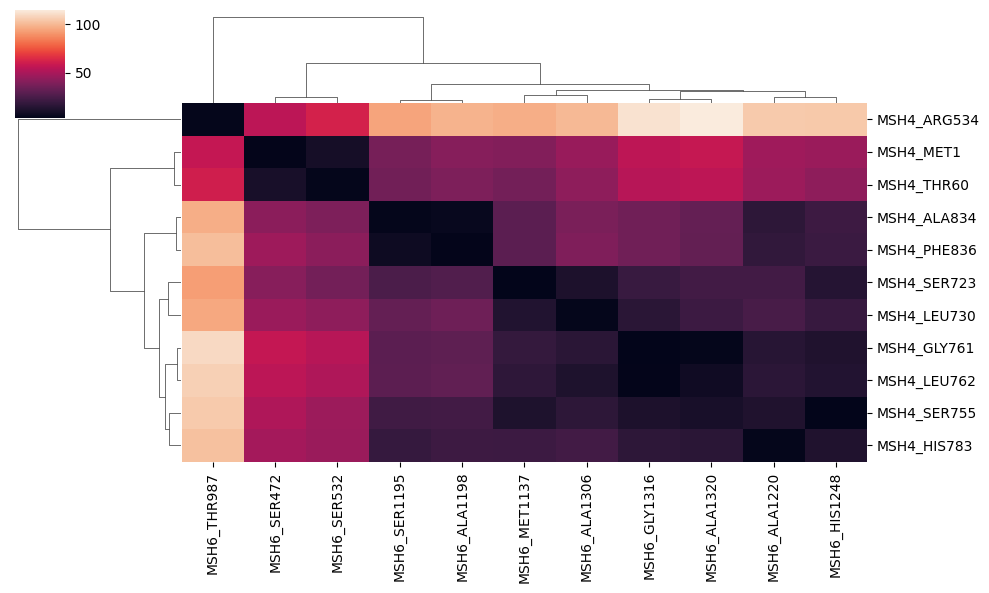

In [40]:
### Clustering of residues on the interface

import seaborn as sns

sns.clustermap(data,metric='euclidean',figsize=(10,6))
plt.savefig('ClusteringMap.png',dpi=300)

In [41]:


print(ix_ls1)
print(ix_ls2)

[755, 762, 60, 723, 761, 534, 783, 1, 834, 730, 836]
[1195, 1248, 1306, 1198, 472, 1220, 1316, 1320, 532, 1137, 987]


In [43]:
### Visualization of the interface residues on PDB

import pymol

ix_ls1 = [res.get_id()[1] for res in set(interface1_list)]
ix_ls2 = [res.get_id()[1] for res in set(interface2_list)]

pymol.cmd.load('MSH2_MSH6_complex.pdb')
pymol.cmd.hide('everything')
#pymol.cmd.color('gray')
pymol.cmd.bg_color('white')
    
pymol.cmd.select('ChainA', "Chain A")
pymol.cmd.show('cartoon', 'ChainA')
pymol.cmd.color('red', 'ChainA')

pymol.cmd.select('ChainB', "Chain B")
pymol.cmd.show('cartoon', 'ChainB')
pymol.cmd.color('blue', 'ChainB')

sel1 = '+'.join([str(num) for num in ix_ls1])
print(sel1)        
pymol.cmd.select('Interface1', "Chain A and resi "+sel1)
pymol.cmd.show('sticks', 'Interface1')
pymol.cmd.color('red', 'Interface1')


sel2 = '+'.join([str(num) for num in ix_ls2])
print(sel2)        
pymol.cmd.select('Interface2', "Chain B and resi "+sel2)
pymol.cmd.show('sticks', 'Interface2')
pymol.cmd.color('blue', 'Interface2')

pymol.cmd.set('cartoon_transparency',0.7)


pymol.cmd.save('Complex_test.pse')

755+762+60+723+761+534+783+1+834+730+836
1195+1248+1306+1198+472+1220+1316+1320+532+1137+987
